In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import qubit states Zero (|0>) and One (|1>), and Pauli operators (X, Y, Z)
from qiskit.opflow import Zero, One, I, X, Y, Z

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import qubit states Zero (|0>) and One (|1>), and Pauli operators (X, Y, Z)
from qiskit.opflow import Zero, One, I, X, Y, Z


In [3]:
# Importing standard Qiskit modules
from qiskit import QuantumCircuit, QuantumRegister, IBMQ, execute, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.circuit import Parameter

# Import state tomography modules
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
import itertools


# Defining the Hamiltonian

In [5]:
def u_t(H, t):
    return (t * H).exp_i()

In [6]:
# IBM code, Returns the matrix representation of the XXX Heisenberg model for 3 spin-1/2 particles in a line
def H_heis3():
    # Interactions (I is the identity matrix; X, Y, and Z are Pauli matricies; ^ is a tensor product)
    XXs = (I^X^X) + (X^X^I)
    YYs = (I^Y^Y) + (Y^Y^I)
    ZZs = (I^Z^Z) + (Z^Z^I)
    
    # Sum interactions
    H = XXs + YYs + ZZs
    
    # Return Hamiltonian
    return H

In [7]:
def Trotter_matrix(t, trotter_steps):

    trotter_matrix = (I^I^I).to_matrix()
    t_matrix = (I^I^I).to_matrix()
    
    for term in terms:
        j, i = term[0], int(term[1]) - 1
                
        if j == 'x':
            operator  = X^X
        elif j == 'y':
            operator  = Y^Y
        elif j  == 'z':
            operator  = Z^Z
            
        if i == 0:
            operator = (operator^I)
        else:
            operator = (I^operator)
        
        u_t_op = u_t(operator, t/trotter_steps).to_matrix()
        t_matrix = np.matmul(t_matrix, u_t_op)
        
    for _ in range(trotter_steps):
        trotter_matrix = np.matmul(trotter_matrix, t_matrix)
        
    return trotter_matrix

# Error Norm

In [125]:
def error(terms, t, trotter_steps):

    trotter_matrix =  Trotter_matrix(t, trotter_steps)
    error_matrix = u_t(H_heis3(), t).to_matrix() - trotter_matrix
    w, v = LA.eig(error_matrix)
    w_abs = np.abs(w)
    
    return max(w_abs)

In [169]:
terms = ['x1', 'y1', 'z1', 'x2', 'y2', 'z2']

In [127]:
error(terms, 1, 3)

0.5596150062889852

In [170]:
# enumeration over permutations
def find_best_order(t, trotter_steps):

    best_perm = terms
    min_error = 2
    errors = []

    for i in itertools.permutations(terms):  
        error_i = error(i, t, trotter_steps)
        errors.append(error_i)
        
        if min_error > error_i:
            min_error = error_i
            best_perm = i
            
    return best_perm, min_error, errors
        

In [146]:
best_perm, min_error, errors = find_best_order(1, 10)

In [147]:
best_perm

('x1', 'x2', 'y1', 'y2', 'z2', 'z1')

In [149]:
min_error

0.12050644735328311

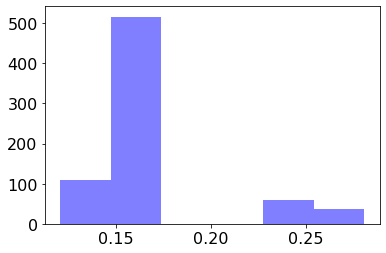

In [148]:
num_bins = 6
n, bins, patches = plt.hist(errors, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [158]:
errors_naive = [error(terms, 1, n) for n in range(10, 30)]

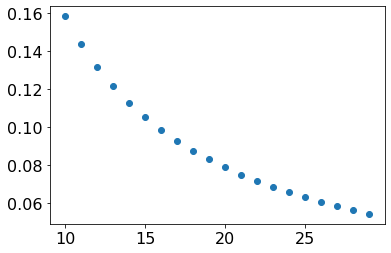

In [159]:
plt.scatter(range(10, 30), errors_naive)

In [161]:
errors_ordered = []
best_perms = []
for n in range(10, 30):
    print('Starting ', n, " trotterization steps")
    best_perm, min_error, errors = find_best_order(1, n)
    best_perms.append(best_perm)

    errors_ordered.append(min_error)

Starting  10  trotterization steps
Starting  11  trotterization steps
Starting  12  trotterization steps
Starting  13  trotterization steps
Starting  14  trotterization steps
Starting  15  trotterization steps
Starting  16  trotterization steps
Starting  17  trotterization steps
Starting  18  trotterization steps
Starting  19  trotterization steps
Starting  20  trotterization steps
Starting  21  trotterization steps
Starting  22  trotterization steps
Starting  23  trotterization steps
Starting  24  trotterization steps
Starting  25  trotterization steps
Starting  26  trotterization steps
Starting  27  trotterization steps
Starting  28  trotterization steps
Starting  29  trotterization steps


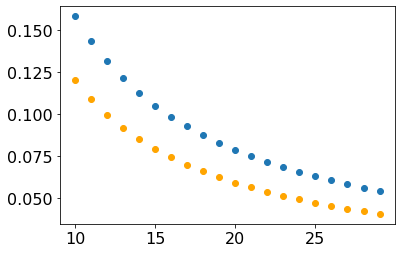

In [165]:
plt.scatter(range(10, 30), errors_ordered, c = 'orange')
plt.scatter(range(10, 30), errors_naive)

In [166]:
best_perms

[('x1', 'x2', 'y1', 'y2', 'z2', 'z1'),
 ('x1', 'z2', 'x2', 'z1', 'y2', 'y1'),
 ('z2', 'z1', 'x1', 'y2', 'x2', 'y1'),
 ('z2', 'x1', 'z1', 'x2', 'y2', 'y1'),
 ('z1', 'z2', 'x1', 'x2', 'y2', 'y1'),
 ('x1', 'x2', 'z2', 'z1', 'y1', 'y2'),
 ('x2', 'x1', 'y2', 'y1', 'z2', 'z1'),
 ('z2', 'z1', 'x1', 'y2', 'x2', 'y1'),
 ('x2', 'z1', 'x1', 'z2', 'y1', 'y2'),
 ('z1', 'x2', 'z2', 'x1', 'y2', 'y1'),
 ('x2', 'z1', 'x1', 'y2', 'z2', 'y1'),
 ('z1', 'z2', 'x1', 'x2', 'y2', 'y1'),
 ('x2', 'x1', 'z1', 'y2', 'z2', 'y1'),
 ('x1', 'x2', 'y1', 'y2', 'z2', 'z1'),
 ('x1', 'x2', 'z1', 'z2', 'y1', 'y2'),
 ('x1', 'x2', 'z1', 'z2', 'y2', 'y1'),
 ('x1', 'x2', 'z1', 'y2', 'z2', 'y1'),
 ('x1', 'x2', 'z1', 'z2', 'y2', 'y1'),
 ('x2', 'x1', 'y2', 'z1', 'y1', 'z2'),
 ('x1', 'y2', 'x2', 'z1', 'y1', 'z2')]

In [46]:
theta = np.pi/6

qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.crx(-1 * theta, 1, 0)
qc.cx(0, 1)

print(qc)

          ┌──────────┐     
q_0: ──■──┤ Rx(-π/6) ├──■──
     ┌─┴─┐└────┬─────┘┌─┴─┐
q_1: ┤ X ├─────■──────┤ X ├
     └───┘            └───┘


In [47]:
from qiskit.quantum_info import Operator
Operator(qc).data

array([[1.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.96592583+0.j        ,
        0.        +0.25881905j, 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.25881905j,
        0.96592583+0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 1.        +0.j        ]])

In [48]:
qc.decompose()